In [1]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

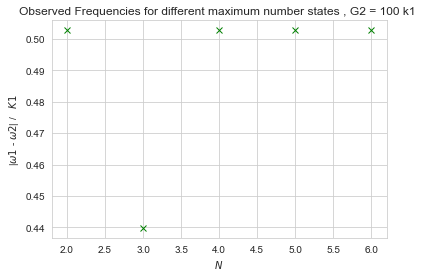

In [48]:
Max_N = 7
k1 = 1
g1 = 0
g2 = (10**2) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 
 
epsilon = k1 - g1
epsilon_2 = k1_2 - g1_2 

Ac = np.sqrt ( epsilon / g2  )
Ac_2 = np.sqrt ( epsilon_2 / g2_2 )

Coupling_rate = 0.5
D = Coupling_rate * k1 

detuning = 0.5 * k1 
omega = 0
omega_2 = detuning + omega 
W_obs_N = []
W_obs_N_2 = []
Range = np.arange(2,Max_N)
frequency_list = []

for M in Range :
    a1 = tensor(destroy(M) , qeye(M))
    a2 = tensor(qeye(M), destroy(M))

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

    c1 = np.sqrt(k1) * a1.dag() 
    c2 = np.sqrt(g1) * a1 
    c3 = np.sqrt(g2/2) * tensor(position(M) * destroy(M) , qeye(M))  # Collapse operators for the 1st oscillator

    c4 = np.sqrt(k1_2) * a2.dag() 
    c5 = np.sqrt(g1_2) * a2 
    c6 = np.sqrt(g2_2/2) * tensor(qeye(M), position(M) * destroy(M)) # Collapse operators for the 2nd Oscillator

    c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
    Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

    wlist = np.linspace(-100, 100, 20000) * 2 * np.pi
    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list.append(mod_W)

    
fig, axes = plt.subplots(1, 1)   
axes.plot(Range , frequency_list, 'gx')
plt.title("Observed Frequencies for different maximum number states , G2 = 100 k1 ")
plt.xlabel(r'$ N $ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

# For this large g2 case can confidently keep it a 2 energy level system.

Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

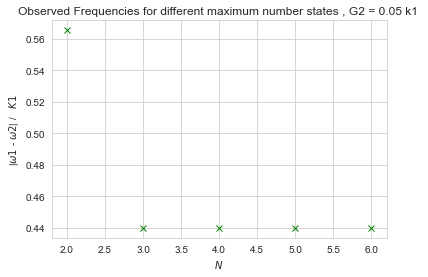

In [49]:
Max_N = 7
k1 = 1
g1 = 0
g2 = (0.05) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 
 
epsilon = k1 - g1
epsilon_2 = k1_2 - g1_2 

Ac = np.sqrt ( epsilon / g2  )
Ac_2 = np.sqrt ( epsilon_2 / g2_2 )

Coupling_rate = 0.5
D = Coupling_rate * k1 

detuning = 0.5 * k1 
omega = 0
omega_2 = detuning + omega 
frequency_list = []
Range = np.arange(2,Max_N)

for M in Range :
    a1 = tensor(destroy(M) , qeye(M))
    a2 = tensor(qeye(M), destroy(M))

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

    c1 = np.sqrt(k1) * a1.dag() 
    c2 = np.sqrt(g1) * a1 
    c3 = np.sqrt(g2/2) * tensor(position(M) * destroy(M) , qeye(M))  # Collapse operators for the 1st oscillator

    c4 = np.sqrt(k1_2) * a2.dag() 
    c5 = np.sqrt(g1_2) * a2 
    c6 = np.sqrt(g2_2/2) * tensor(qeye(M), position(M) * destroy(M)) # Collapse operators for the 2nd Oscillator

    c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
    Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

    wlist = np.linspace(-100, 100, 20000) * 2 * np.pi
    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list.append(mod_W)
    

    
fig, axes = plt.subplots(1, 1)   
axes.plot(Range , frequency_list, 'gx')
plt.title("Observed Frequencies for different maximum number states , G2 = 0.05 k1 ")
plt.xlabel(r'$ N $ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

# For g2 = 0.05K1 ( classical limit).

Text(0, 0.5, 'Power spectrum')

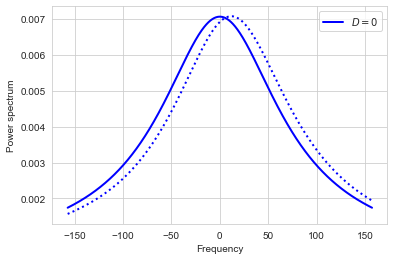

In [70]:
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 
 
epsilon = k1 - g1
epsilon_2 = k1_2 - g1_2 

Ac = np.sqrt ( epsilon / g2  )
Ac_2 = np.sqrt ( epsilon_2 / g2_2 )

Coupling_rate = 0
D = Coupling_rate * k1 

detuning = 10 * k1 
omega = 0
omega_2 = detuning + omega 

H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

wlist = np.linspace(-25, 25, 20000) * 2 * np.pi
spec_ = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec, 'b', lw=2, label='$D = 0$')
ax.plot(wlist , spec_2, 'b:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')



Text(0, 0.5, 'Power spectrum')

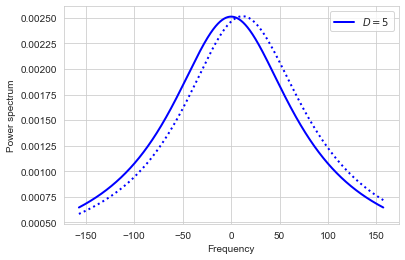

In [79]:
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 
 
epsilon = k1 - g1
epsilon_2 = k1_2 - g1_2 

Ac = np.sqrt ( epsilon / g2  )
Ac_2 = np.sqrt ( epsilon_2 / g2_2 )

Coupling_rate = 5
D = Coupling_rate * k1 

detuning = 10 * k1 
omega = 0
omega_2 = detuning + omega 

H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

wlist = np.linspace(-25, 25, 20000) * 2 * np.pi
spec_5k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_5k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_5k1, 'b', lw=2, label='$D = 5$')
ax.plot(wlist , spec_2_5k1, 'b:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')



Text(0, 0.5, 'Power spectrum')

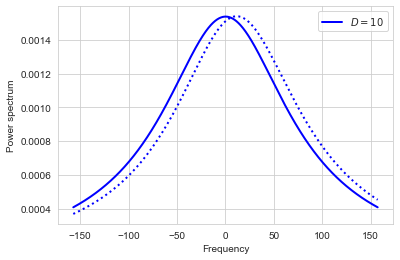

In [90]:
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 
 
epsilon = k1 - g1
epsilon_2 = k1_2 - g1_2 

Ac = np.sqrt ( epsilon / g2  )
Ac_2 = np.sqrt ( epsilon_2 / g2_2 )

Coupling_rate = 10
D = Coupling_rate * k1 

detuning = 10 * k1 
omega = 0
omega_2 = detuning + omega 

H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

wlist = np.linspace(-25, 25, 20000) * 2 * np.pi
spec_10k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_10k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_10k1, 'b', lw=2, label='$D = 10$')
ax.plot(wlist , spec_2_10k1, 'b:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')



Text(0, 0.5, 'Power spectrum')

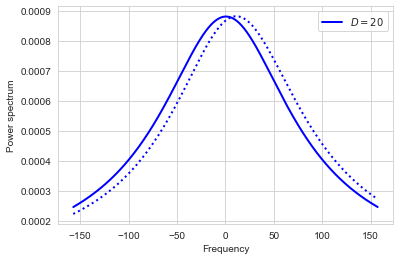

In [92]:
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 
 
epsilon = k1 - g1
epsilon_2 = k1_2 - g1_2 

Ac = np.sqrt ( epsilon / g2  )
Ac_2 = np.sqrt ( epsilon_2 / g2_2 )

Coupling_rate = 20
D = Coupling_rate * k1 

detuning = 10 * k1 
omega = 0
omega_2 = detuning + omega 

H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

wlist = np.linspace(-25, 25, 20000) * 2 * np.pi
spec_20k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_20k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_20k1, 'b', lw=2, label='$D = 20$')
ax.plot(wlist , spec_2_20k1, 'b:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')



Text(0, 0.5, 'Power spectrum')

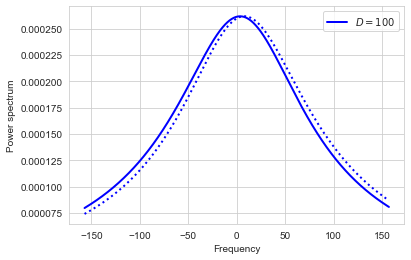

In [82]:
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 
 
epsilon = k1 - g1
epsilon_2 = k1_2 - g1_2 

Ac = np.sqrt ( epsilon / g2  )
Ac_2 = np.sqrt ( epsilon_2 / g2_2 )

Coupling_rate = 100
D = Coupling_rate * k1 

detuning = 10 * k1 
omega = 0
omega_2 = detuning + omega 

H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

wlist = np.linspace(-25, 25, 20000) * 2 * np.pi
spec_100k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_100k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_100k1, 'b', lw=2, label='$D = 100$')
ax.plot(wlist , spec_2_100k1, 'b:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')



Text(0, 0.5, 'S($\\omega$)/ $\\gamma1$ ')

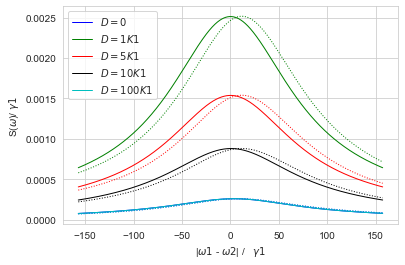

In [95]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec, 'b', lw=1, label='$D = 0$')
ax.plot(wlist , spec_2, 'b:', lw=1)

ax.plot(wlist , spec_5k1, 'g', lw=1, label='$D = 1K1 $')
ax.plot(wlist , spec_2_5k1, 'g:', lw=1)

ax.plot(wlist , spec_10k1, 'r', lw=1, label='$D = 5K1 $')
ax.plot(wlist , spec_2_10k1, 'r:', lw=1)

ax.plot(wlist , spec_20k1, 'k', lw=1, label='$D = 10K1 $')
ax.plot(wlist , spec_2_20k1, 'k:', lw=1)

ax.plot(wlist , spec_100k1, 'c', lw=1, label='$D = 100K1 $')
ax.plot(wlist , spec_2_100k1, 'c:', lw=1)

ax.legend()
ax.set_xlabel(r'|$ \omega1$ - $\omega2 $| /   $\gamma1$ ') 
ax.set_ylabel('S($\omega$)/ $\gamma1$ ')



# Here we see in bold lines the 1st oscillator, dotted lines the 2nd.
# They have a detuning which ofsets their peaks, as we can see increasing the coupling between oscillators leads to them both finding some mean frequency.
# This behaviour is essentially the same as the RVDP, the range of frequency is much larger however.

# We have broader peaks here, however the qualitative behaviour is the same.

# We will now investigate entrainment.


Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

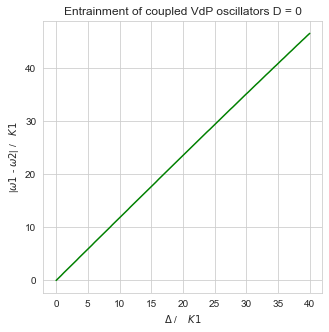

In [99]:
# Now lets look at how frequency entrainment looks for this model.
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

Coupling_rate = 0
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list = []

for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list , 'g' )

plt.title("Entrainment of coupled VdP oscillators D = 0")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

#Here we can see that for 0 coupling between oscillators there is no entrainment of the rhythm at all.



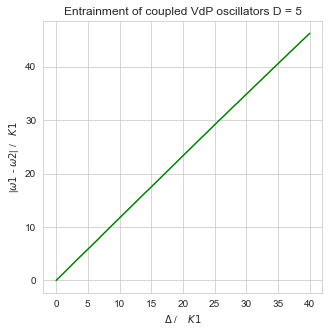

In [100]:
# Now lets look at how frequency entrainment looks for this model.
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

Coupling_rate = 5
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list_5D = []

for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_5D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_5D , 'g' )

plt.title("Entrainment of coupled VdP oscillators D = 5")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

np.save('Coupled VDP W vs Detuning, D=0' , frequency_list)
np.save('Coupled VDP W vs Detuning, D=5' , frequency_list_5D)



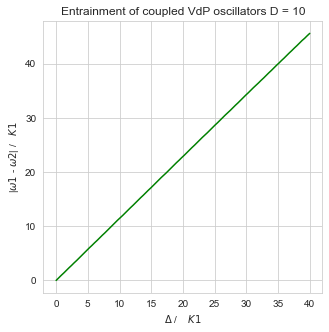

In [101]:
# Now lets look at how frequency entrainment looks for this model.
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

Coupling_rate = 10
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list_10D = []

for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_10D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_10D , 'g' )

plt.title("Entrainment of coupled VdP oscillators D = 10")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 


np.save('Coupled VDP W vs Detuning, D=10' , frequency_list_10D)



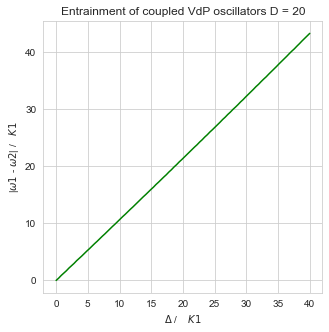

In [103]:
# Now lets look at how frequency entrainment looks for this model.
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

Coupling_rate = 20
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list_20D = []

for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_20D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_20D , 'g' )

plt.title("Entrainment of coupled VdP oscillators D = 20")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

np.save('Coupled VDP W vs Detuning, D=20' , frequency_list_20D)


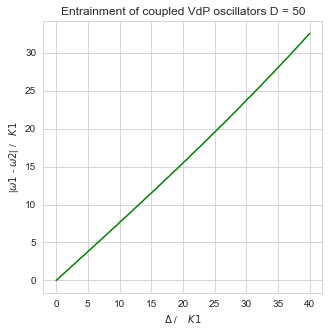

In [104]:
# Now lets look at how frequency entrainment looks for this model.
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

Coupling_rate = 50
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list_50D = []

for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_50D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_50D , 'g' )

plt.title("Entrainment of coupled VdP oscillators D = 50")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

np.save('Coupled VDP W vs Detuning, D=50' , frequency_list_50D)


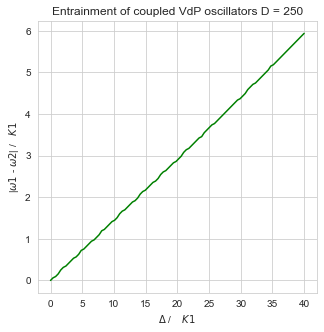

In [105]:
# Now lets look at how frequency entrainment looks for this model.
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

Coupling_rate = 250
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list_250D = []

for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_250D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_250D , 'g' )

plt.title("Entrainment of coupled VdP oscillators D = 250")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

np.save('Coupled VDP W vs Detuning, D=250' , frequency_list_250D)


Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

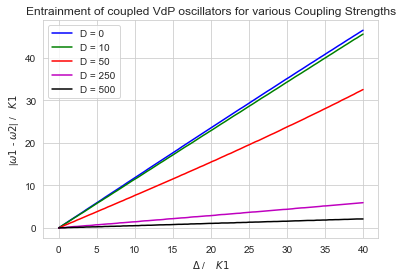

In [117]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1)
axes.plot(d_range , frequency_list , 'b' ,label = 'D = 0')
#axes.plot(d_range , frequency_list_5D , 'r',label = 'D = 5' )
axes.plot(d_range , frequency_list_10D , 'g' ,label = 'D = 10')
#axes.plot(d_range , frequency_list_20D , 'r',label = 'D = 20' )
axes.plot(d_range , frequency_list_50D , 'r' ,label = 'D = 50')
axes.plot(d_range , frequency_list_250D , 'm' ,label = 'D = 250' )
axes.plot(d_range , frequency_list_500D , 'k' ,label = 'D = 500' )



 

plt.legend()


plt.title("Entrainment of coupled VdP oscillators for various Coupling Strengths")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

# The 2 Identical coupled VDP oscillators essentially have linear relations between observed freq vs initial detuning
# The strength of the coupling reduces the gradient.
# This isn't quite the same as the RVdP's 'synchronisation region'. However, its clear that stronger coupling leads to stronger entrainment
# Would be interesting to create this plot for a larger cycle coupled to a small one.

# Also we need very large couplings to illicit the same behaviour that weak couplings cause in the RVdP
# How does this compare with the single oscillators in a drive? 


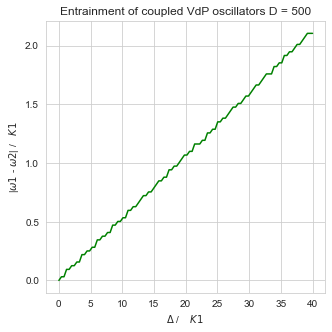

In [113]:
# Now lets look at how frequency entrainment looks for this model.
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**3) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

Coupling_rate = 500
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list_500D = []

for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_500D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_500D , 'g' )

plt.title("Entrainment of coupled VdP oscillators D = 500")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

np.save('Coupled VDP W vs Detuning, D=500' , frequency_list_500D)


Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

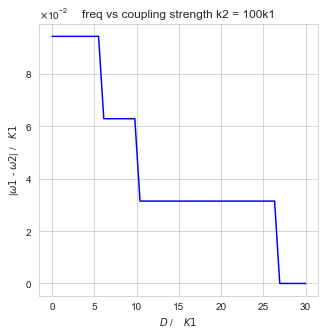

In [133]:
N = 5

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**2) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

detuning = 0.1 * k1 
omega = 0
omega_2 = detuning + omega 

wlist = np.linspace(0, 100, 20000) * 2 * np.pi

wlist_100k1 = []

Coupling_rate_range = np.linspace(0,30,50)

for D in Coupling_rate_range:
    
    c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
    Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 
    
    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_100k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_100k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_100k1.argmax()]
    W_observed_2 = wlist[spec_2_100k1.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    wlist_100k1.append(mod_W)

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
    
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)


axes.plot(Coupling_rate_range , wlist_100k1 , 'b' )
plt.title("freq vs coupling strength k2 = 100k1")
plt.xlabel(r'$D$ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 


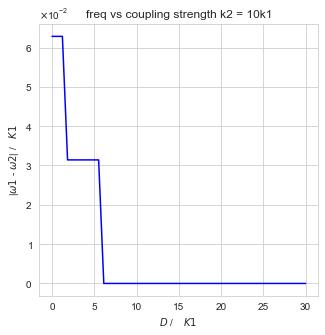

In [134]:
N = 7

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**1) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

detuning = 0.1 * k1 
omega = 0
omega_2 = detuning + omega 

wlist = np.linspace(0, 100, 20000) * 2 * np.pi

wlist_10k1 = []

Coupling_rate_range = np.linspace(0,30,50)

for D in Coupling_rate_range:
    
    c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
    Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 
    
    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_10k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_10k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_10k1.argmax()]
    W_observed_2 = wlist[spec_2_10k1.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    wlist_10k1.append(mod_W)

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
    
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)


axes.plot(Coupling_rate_range , wlist_10k1 , 'b' )
plt.title("freq vs coupling strength k2 = 10k1")
plt.xlabel(r'$D$ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

np.save('Coupled VDP W vs Drive, g2=100k1' , wlist_100k1)
np.save('Coupled VDP W vs Drive, g2 = 10k1' , wlist_10k1)


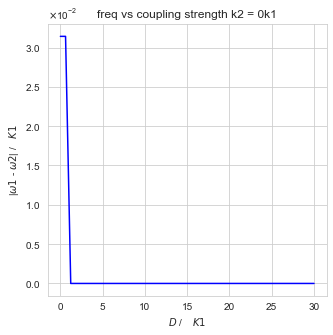

In [2]:
N = 7

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (10**0) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

detuning = 0.1 * k1 
omega = 0
omega_2 = detuning + omega 

wlist = np.linspace(0, 100, 20000) * 2 * np.pi

wlist_0k1 = []

Coupling_rate_range = np.linspace(0,30,50)

for D in Coupling_rate_range:
    
    c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
    Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 
    
    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_0k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_0k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_0k1.argmax()]
    W_observed_2 = wlist[spec_2_0k1.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    wlist_0k1.append(mod_W)

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
    
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)


axes.plot(Coupling_rate_range , wlist_0k1 , 'b' )
plt.title("freq vs coupling strength k2 = 1k1") 
plt.xlabel(r'$D$ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 


np.save('Coupled VDP W vs Drive, g2 = 0k1' , wlist_0k1)


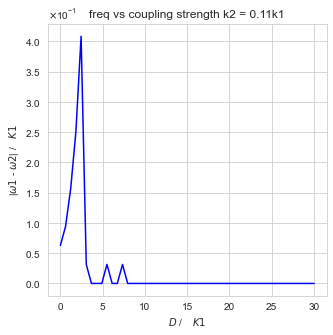

In [15]:
N = 8

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (0.1) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

detuning = 0.1 * k1 
omega = 0
omega_2 = detuning + omega 

wlist = np.linspace(0, 100, 20000) * 2 * np.pi

wlist_01k1 = []

Coupling_rate_range = np.linspace(0,30,50)

for D in Coupling_rate_range:
    
    c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
    Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 
    
    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_01k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_01k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_01k1.argmax()]
    W_observed_2 = wlist[spec_2_01k1.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    wlist_01k1.append(mod_W)

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
    
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)


axes.plot(Coupling_rate_range , wlist_01k1 , 'b' )
plt.title("freq vs coupling strength k2 = 0.11k1")
plt.xlabel(r'$D$ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 


np.save('Coupled VDP W vs Drive, g2 = 0.1k1' , wlist_01k1)


In [ ]:
N = 8

a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
g1 = 0
g2 = (0.1) * k1

k1_2 = k1
g1_2 = g1
g2_2 = g2 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(g1) * a1 
c3 = np.sqrt(g2/2) * tensor(position(N) * destroy(N) , qeye(N))  # Collapse operators for the 1st oscillator

c4 = np.sqrt(k1_2) * a2.dag() 
c5 = np.sqrt(g1_2) * a2 
c6 = np.sqrt(g2_2/2) * tensor(qeye(N), position(N) * destroy(N)) # Collapse operators for the 2nd Oscillator

detuning = 0.05 * k1 
omega = 0
omega_2 = detuning + omega 

wlist = np.linspace(0, 100, 20000) * 2 * np.pi

wlist_005k1 = []

Coupling_rate_range = np.linspace(0,30,50)

for D in Coupling_rate_range:
    
    c7 = np.sqrt(D) * ( a1 - a2 ) # Dissipative Coupling between them.
    Collapse = [c1 , c2 ,c3, c4 , c5 , c6 , c7 ] 
    
    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_005k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_005k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_005k1.argmax()]
    W_observed_2 = wlist[spec_2_005k1.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    wlist_005k1.append(mod_W)

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
    
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)


axes.plot(Coupling_rate_range , wlist_005k1 , 'b' )
plt.title("freq vs coupling strength k2 = 0.051k1")
plt.xlabel(r'$D$ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 


np.save('Coupled VDP W vs Drive, g2 = 0.05k1' , wlist_005k1)


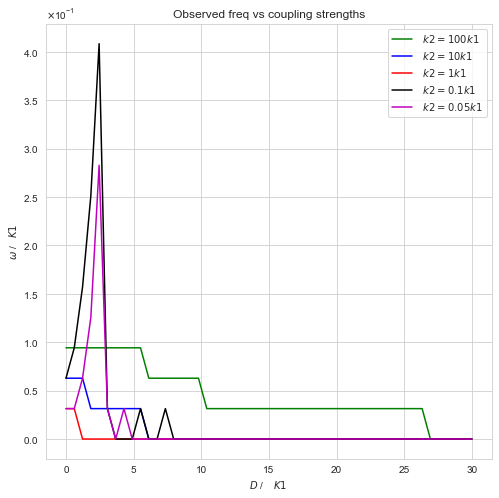

In [16]:
sns.set_style('whitegrid')
wlist_100k1 = np.load('Coupled VDP W vs Drive, g2=100k1.npy')
wlist_10k1 = np.load('Coupled VDP W vs Drive, g2 = 10k1.npy')
wlist_1k1 = np.load('Coupled VDP W vs Drive, g2 = 0k1.npy')

fig, axes = plt.subplots(1, 1, figsize=(8,8))

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.yaxis.set_major_formatter(formatter)

#axes.plot( np.linspace(0,30,50), wlist_1000k1 , 'r' , label = r' $k2 = 1000 k1 $' )
axes.plot( np.linspace(0,30,50), wlist_100k1 , 'g', label = r' $k2 = 100 k1 $' )
axes.plot( np.linspace(0,30,50), wlist_10k1 , 'b', label = r' $k2 = 10 k1 $' )
axes.plot( np.linspace(0,30,50), wlist_1k1 , 'r' , label = r' $k2 = 1 k1 $')
axes.plot( np.linspace(0,30,50), wlist_01k1 , 'k', label = r' $k2 = 0.1 k1 $' )
axes.plot( np.linspace(0,30,50), wlist_005k1 , 'm', label = r' $k2 = 0.05 k1 $' )
plt.title("Observed freq vs coupling strengths")
plt.xlabel(r'$D$ /    $K1$ ')
plt.ylabel(r'$ \omega $ /   $K1$ ')
plt.legend() 




In [ ]:
# I would say that this is likely a result of a lack of sufficent energy levels, we see these peaks for very small k2 values
# These correspond to the more classical systems and it doesn't make intuitive sense for this behaviour.
# Ultimately, the different systems all do tend to 0 frequency difference for arbritarily high drive
# We also see that this occurs much later of the quantum limit for this oscillator than for the RvdP. 
# Why would this be the case? 

# Strangr that 